In [3]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 5.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 8.2 MB/s eta 0:00:0000:0100:01


In [2]:
import pandas as pd
# path = 'drive/MyDrive/data/earnings.csv'
path = 'earnings.csv'

In [2]:
df = pd.read_csv(path, sep=";")
df

,id,base,bonus,overtime_pay,other,sector,section_07,sex,education,contract,age,duration_total,duration_entity,duration_nominal,duration_overtime
0,192064,26651.53,0.00,0.00,0.00,1,3,2,4,1,49,33.03,7.06,1524.15,0.0
1,25495,40168.50,1500.00,0.00,3414.32,1,2,1,1,1,36,10.07,6.01,1562.40,0.0
2,142164,20134.80,0.00,0.00,1700.41,1,2,2,4,1,52,28.08,19.05,1816.00,0.0
3,198034,16475.00,0.00,0.00,1305.00,1,2,2,5,1,55,35.07,11.01,1816.00,0.0
4,144990,34797.60,0.00,1893.35,3118.73,1,2,2,2,1,50,27.00,19.01,722.80,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,41597,36573.22,1323.65,1276.80,3337.32,1,2,2,2,1,50,27.02,27.02,766.80,40.0
10996,120022,28280.00,5470.00,0.00,2385.13,1,1,2,4,1,41,18.08,15.09,1792.00,0.0
10997,41800,109316.96,0.00,0.00,9042.58,1,1,2,2,1,47,20.02,1.07,1656.00,0.0
10998,153849,57721.35,6950.00,0.00,4906.32,1,1,2,2,1,47,28.01,21.10,1784.00,0.0


# Data description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 11000 non-null  int64  
 1   base               11000 non-null  float64
 2   bonus              11000 non-null  float64
 3   overtime_pay       11000 non-null  float64
 4   other              11000 non-null  float64
 5   sector             11000 non-null  int64  
 6   section_07         11000 non-null  int64  
 7   sex                11000 non-null  int64  
 8   education          11000 non-null  int64  
 9   contract           11000 non-null  int64  
 10  age                11000 non-null  int64  
 11  duration_total     11000 non-null  float64
 12  duration_entity    11000 non-null  float64
 13  duration_nominal   11000 non-null  float64
 14  duration_overtime  11000 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 1.3 MB


There are 11k observations in the sample, each has 14 variables. 9 of them are quantitive and 5 of them are qualitative. There is no missing data.

In [ ]:
# 1) Quantitative variables
quant_vars = ['base', 'bonus', 'overtime_pay', 'other',
              'age', 'duration_total', 'duration_entity',
              'duration_nominal', 'duration_overtime']
df[quant_vars].describe().T

,count,mean,std,min,25%,50%,75%,max
base,11000.0,33376.738065,19276.551638,10.00,20995.115,31341.245,41348.2900,241624.39
bonus,11000.0,2128.486176,4966.444726,0.00,0.000,620.000,2940.7175,258061.00
overtime_pay,11000.0,1679.273923,5407.964344,0.00,0.000,0.000,1139.3300,228110.34
other,11000.0,2477.625815,3715.419120,0.00,0.000,2141.820,3497.4300,88555.76
age,11000.0,42.470182,10.012140,19.00,34.000,43.000,51.0000,77.00
duration_total,11000.0,18.567080,10.996950,0.01,9.030,19.035,27.1100,57.02
duration_entity,11000.0,11.401382,9.322181,0.01,3.070,9.100,18.0400,46.01
duration_nominal,11000.0,1301.307435,540.189234,12.80,766.800,1591.900,1768.0000,2024.00
duration_overtime,11000.0,47.702325,111.963867,0.00,0.000,0.000,40.0000,1812.58


Key takeaways:

* Pay variables (base, bonus, overtime_pay, other) are all right-skewed with long tails and extreme outliers (max values 5–6 orders of magnitude above medians).

* Many zeros in bonus and overtime pay: at least 25% (and up to 50% for overtime) of employees receive none.

* Age is fairly symmetric, centered around 42.

* Tenure (duration_total and duration_entity) is moderately right-skewed, suggesting some employees have very long service.

* Nominal hours cluster around standard full-time hours (~1 600 h), but data quality may need checking for very low values.

* Overtime hours have a mass at zero and a long tail—some employees work thousands of overtime hours.

In [ ]:
# 2) Qualitative variables
qual_vars = ['sector', 'section_07', 'sex', 'education', 'contract']
for col in qual_vars:
    print(df[col].value_counts(), '\n')

sector
1    10548
2      452
Name: count, dtype: int64 

section_07
2    5867
3    2732
1    2401
Name: count, dtype: int64 

sex
2    8289
1    2711
Name: count, dtype: int64 

education
2    6633
4    1983
5     906
3     680
1     430
6     368
Name: count, dtype: int64 

contract
1    9306
2    1694
Name: count, dtype: int64 



Key takeaways:

* The sample is overwhelmingly drawn from public‐sector entities.
* Over half of the observations come from the education subsector.
* Three-quarters of the sample are female.
* A clear majority (60 %) hold a higher-education degree; only a small fraction have less than secondary schooling.
* Most employees here are on open-ended contracts; fixed-term contracts are relatively uncommon.

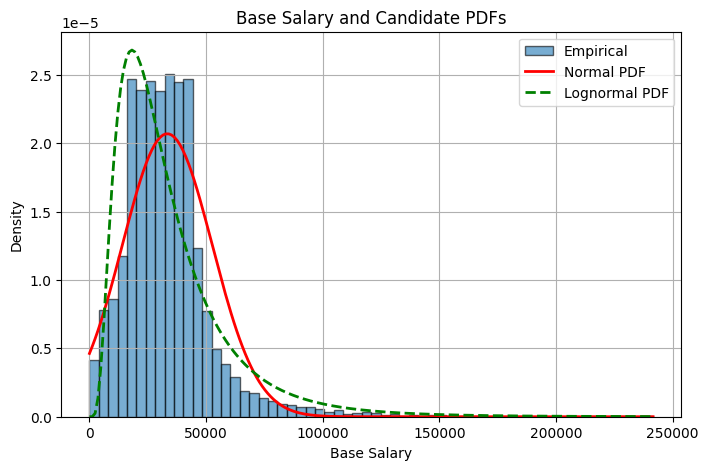

(np.float64(0.6580446447007716),
 np.float64(28073.066000540464),
 3.0458411227426443,
 np.float64(10958.134951730899))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm, gamma

# Extract base salary
base = df['base']

# Fit log-normal: fix loc=0 for simplicity
shape_ln, loc_ln, scale_ln = lognorm.fit(base, floc=0)
# Fit gamma
shape_g, loc_g, scale_g = gamma.fit(base, floc=0)

# Prepare x-axis
xs = np.linspace(base.min(), base.max(), 200)

plt.figure(figsize=(8, 5))
# Histogram
plt.hist(base, bins=60, density=True, edgecolor='black', alpha=0.6, label='Empirical')

# Normal PDF
mu, sigma = base.mean(), base.std()
plt.plot(xs, norm.pdf(xs, mu, sigma), 'r-', lw=2, label='Normal PDF')

# Log-normal PDF
plt.plot(xs, lognorm.pdf(xs, shape_ln, loc=loc_ln, scale=scale_ln), 'g--', lw=2, label='Lognormal PDF')

plt.title('Base Salary and Candidate PDFs')
plt.xlabel('Base Salary')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# Print fitted parameters
shape_ln, scale_ln, shape_g, scale_g


Base salaries are heavily right-skewed, with most employees clustered around 20-40K zł but a long tail extending past 200K zł, so a Gaussian model badly underestimates the central peak and overestimates both tails. The log-normal PDF provides the closest match—capturing both the sharp mode and heavy upper.

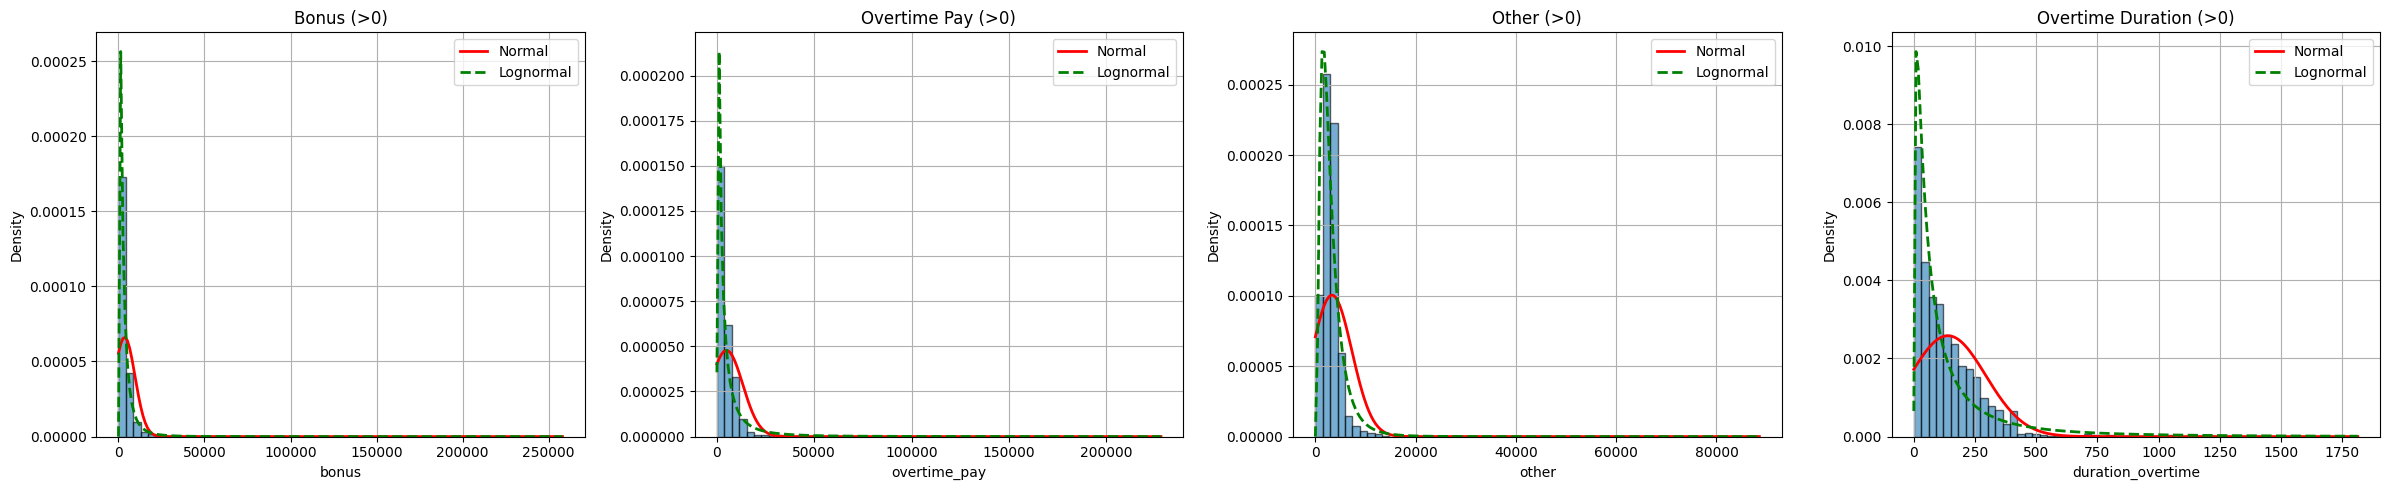

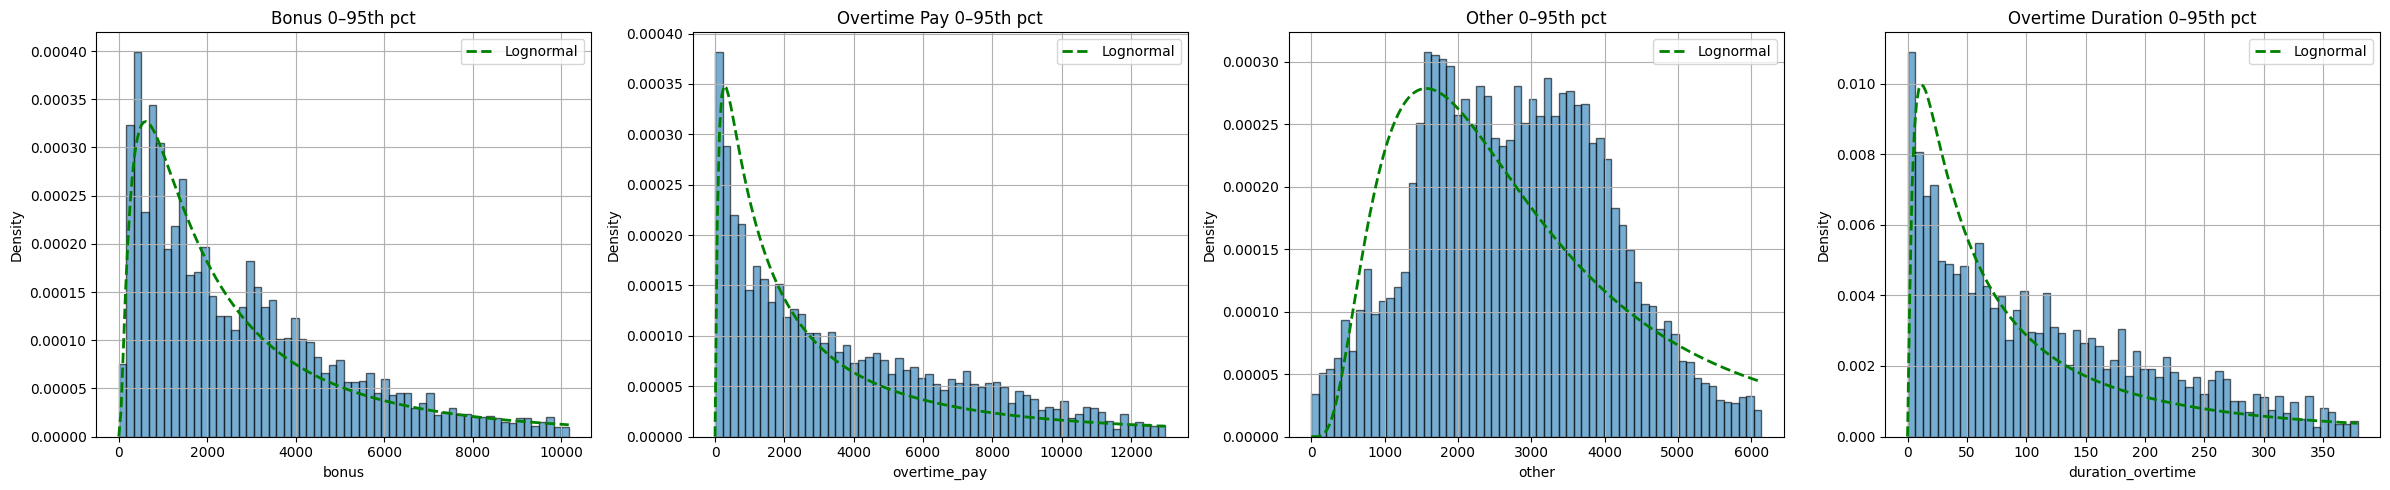

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, lognorm

variables = ['bonus', 'overtime_pay', 'other', 'duration_overtime']
titles = ['Bonus', 'Overtime Pay', 'Other', 'Overtime Duration']

# Standard plots with normal and log-normal PDFs
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
for ax, var, title in zip(axes, variables, titles):
    data = df[var]
    pos = data[data > 0]
    # Fit normal & log-normal to positives
    mu, sigma = pos.mean(), pos.std()
    shape, loc, scale = lognorm.fit(pos, floc=0)
    xs = np.linspace(pos.min(), pos.max(), 200)

    ax.hist(pos, bins=60, density=True, alpha=0.6, edgecolor='black')
    ax.plot(xs, norm.pdf(xs, mu, sigma), 'r-', lw=2, label='Normal')
    ax.plot(xs, lognorm.pdf(xs, shape, loc=loc, scale=scale), 'g--', lw=2, label='Lognormal')
    ax.set_title(f'{title} (>0)')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

# 95%-cutoff plots with log-normal only
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
for ax, var, title in zip(axes, variables, titles):
    data = df[var]
    pos = data[data > 0]
    cutoff = pos.quantile(0.95)
    shape, loc, scale = lognorm.fit(pos, floc=0)
    xs = np.linspace(0, cutoff, 200)

    ax.hist(pos, bins=60, density=True, range=(0, cutoff), alpha=0.6, edgecolor='black')
    ax.plot(xs, lognorm.pdf(xs, shape, loc=loc, scale=scale), 'g--', lw=2, label='Lognormal')
    ax.set_title(f'{title} 0–95th pct')
    ax.set_xlabel(var)
    ax.set_ylabel('Density')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()


All three pay components share the same pattern: a large spike at small positive values plus a long right tail, which log-normal densities track far better than Gaussians. Zooming in on the 0-95th percentile in each reinforces that log-normal remains an excellent fit to the core distribution for bonus, overtime pay, 'other' and overtime duration.

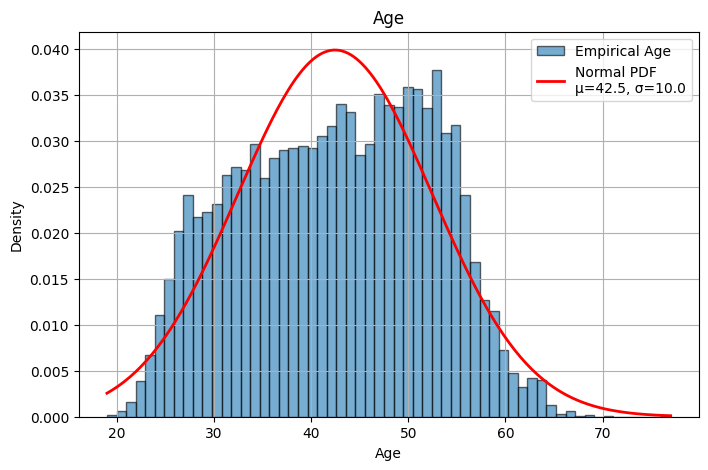

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract age
age = df['age']

# Fit normal distribution
mu_age, sigma_age = age.mean(), age.std()

# Prepare x-axis
xs = np.linspace(age.min(), age.max(), 200)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(age, bins=59, density=True, edgecolor='black', alpha=0.6, label='Empirical Age')
ax.plot(xs, norm.pdf(xs, mu_age, sigma_age), 'r-', lw=2, label=f'Normal PDF\nμ={mu_age:.1f}, σ={sigma_age:.1f}')

ax.set_title('Age')
ax.set_xlabel('Age')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True)
plt.show()


Age is roughly bell‐shaped (mean ≈42.5, SD ≈10) with a subtle right skew.


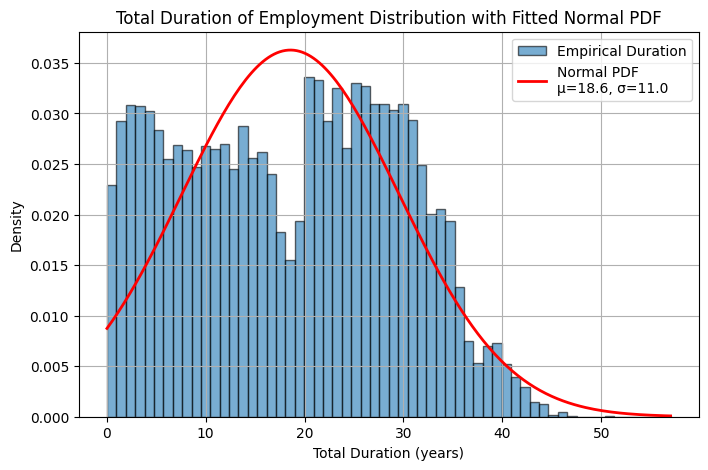

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract total duration
duration = df['duration_total']

# Fit normal distribution
mu_dt, sigma_dt = duration.mean(), duration.std()

# Prepare x-axis
xs = np.linspace(duration.min(), duration.max(), 200)

# Plot on linear scale
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(duration, bins=60, density=True, edgecolor='black', alpha=0.6, label='Empirical Duration')
ax.plot(xs, norm.pdf(xs, mu_dt, sigma_dt), 'r-', lw=2, label=f'Normal PDF\nμ={mu_dt:.1f}, σ={sigma_dt:.1f}')

ax.set_title('Total Duration of Employment')
ax.set_xlabel('Total Duration (years)')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True)
plt.show()


Total duration is roughly bell-shaped around 18.6 years (σ≈11) but with a slight right skew and some piled zeros at very low values. The fitted normal curve captures the center well but underestimates the heavier right tail.

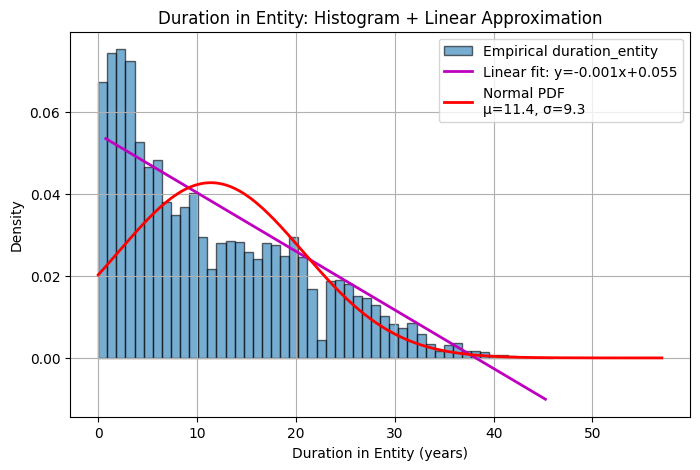

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract duration_entity
dur_entity = df['duration_entity']

# Compute histogram
counts, bin_edges = np.histogram(dur_entity, bins=30, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Fit a simple linear function to the density
slope, intercept = np.polyfit(bin_centers, counts, 1)

# Fit normal distribution
mu_de, sigma_de = dur_entity.mean(), dur_entity.std()

# Prepare x-axis for line
xs_line = np.array([bin_centers.min(), bin_centers.max()])
ys_line = intercept + slope * xs_line

# Plot histogram and linear fit
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(dur_entity, bins=50, density=True, edgecolor='black', alpha=0.6, label='Empirical duration_entity')
ax.plot(xs_line, ys_line, 'm-', lw=2, label=f'Linear fit: y={slope:.3f}x+{intercept:.3f}')
ax.plot(xs, norm.pdf(xs, mu_de, sigma_de), 'r-', lw=2, label=f'Normal PDF\nμ={mu_de:.1f}, σ={sigma_de:.1f}')

ax.set_title('Duration in Entity: Histogram + Linear Approximation')
ax.set_xlabel('Duration in Entity (years)')
ax.set_ylabel('Density')
ax.legend()
ax.grid(True)
plt.show()


Linear model offers a slightly better match to these histogram estimates than the Gaussian PDF.

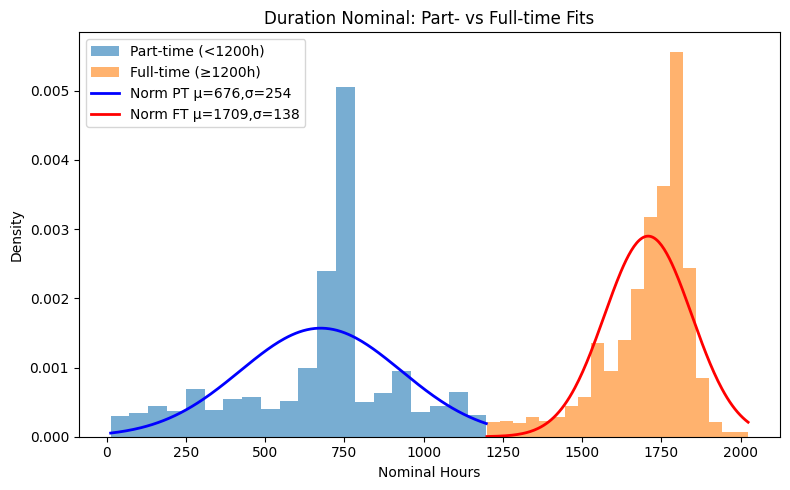

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Use a threshold to approximate part‑ vs full‑time (e.g. 1,200 hours/year)
threshold = 1200
part_time = df[df['duration_nominal'] < threshold]['duration_nominal']
full_time = df[df['duration_nominal'] >= threshold]['duration_nominal']

# Fit normals
mu_pt, sigma_pt = part_time.mean(), part_time.std()
mu_ft, sigma_ft = full_time.mean(), full_time.std()

# Prepare x-axis
xs_pt = np.linspace(part_time.min(), part_time.max(), 200)
xs_ft = np.linspace(full_time.min(), full_time.max(), 200)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(part_time, bins=20, density=True, alpha=0.6, label=f'Part‑time (<{threshold}h)')
ax.hist(full_time, bins=20, density=True, alpha=0.6, label=f'Full‑time (≥{threshold}h)')
ax.plot(xs_pt, norm.pdf(xs_pt, mu_pt, sigma_pt), 'b-', lw=2, label=f'Norm PT μ={mu_pt:.0f},σ={sigma_pt:.0f}')
ax.plot(xs_ft, norm.pdf(xs_ft, mu_ft, sigma_ft), 'r-', lw=2, label=f'Norm FT μ={mu_ft:.0f},σ={sigma_ft:.0f}')

ax.set_title('Duration Nominal: Part‑ vs Full‑time Fits')
ax.set_xlabel('Nominal Hours')
ax.set_ylabel('Density')
ax.legend()
plt.tight_layout()
plt.show()

Splitting at 1 200 hours cleanly isolates a part-time cluster (μ≈676 h, σ≈254 h) and a full-time cluster (μ≈1 709 h, σ≈138 h), each of which is far more symmetrically distributed than the undifferentiated mix. Modeling hours separately by employment intensity both reflects the underlying workforce structure and yields much better individual fits than a single, blended curve.

# Clustering

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load data
df = pd.read_csv(path, sep=";")

# 2. Signed-log transform for pay variables
def signed_log(x):
    return np.sign(x) * np.log1p(np.abs(x))

df['base_slog'] = signed_log(df['base'])
df['extra_total'] = df['bonus'] + df['overtime_pay'] + df['other']
df['extra_slog'] = signed_log(df['extra_total'])

# 3. One-hot encode categorical variables
df_dummies = pd.get_dummies(df[['sector', 'education', 'sex', 'contract']].astype(str), drop_first=True)

# 4. Define subsets with proper dummy column references
subsets = {
    'pay_structure':       ['base_slog','extra_slog'],
    'career_stage_comp':   ['age','base_slog','extra_slog'],
    'sector_pay':          ['base_slog','extra_slog'] + [c for c in df_dummies if c.startswith('sector_')],
    'education_salary':    ['base_slog','extra_slog'] + [c for c in df_dummies if c.startswith('education_')],
}

# 5. Standardize continuous variables once for all
cont_cols = ['age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime', 'base_slog', 'extra_slog']
scaler = StandardScaler()
df_scaled_cont = pd.DataFrame(scaler.fit_transform(df[cont_cols]), columns=cont_cols)

# 6. Compute best silhouette for each subset
results = []
for name, cols in subsets.items():
    # separate continuous and dummy columns
    cont_in_subset = [c for c in cols if c in cont_cols]
    cat_in_subset = [c for c in cols if c in df_dummies.columns]

    # build feature matrix
    X = pd.concat([df_scaled_cont[cont_in_subset], df_dummies[cat_in_subset]], axis=1)

    best_score = -1
    best_k = None
    for k in range(2, 11):
        km = KMeans(n_clusters=k, n_init=10, random_state=42)
        labels = km.fit_predict(X)
        score = silhouette_score(X, labels)
        if score > best_score:
            best_score, best_k = score, k

    results.append({'subset': name, 'best_k': best_k, 'best_silhouette': best_score})

# 7. Display results
results_df = pd.DataFrame(results)
results_df

,subset,best_k,best_silhouette
0,pay_structure,2,0.649497
1,career_stage_comp,2,0.479539
2,sector_pay,2,0.643699
3,education_salary,2,0.535700


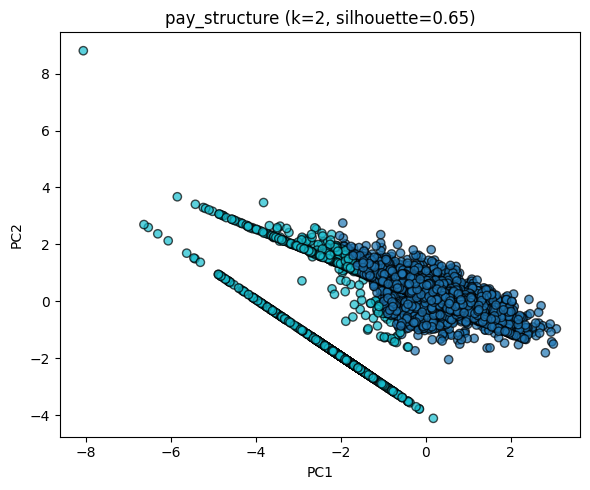

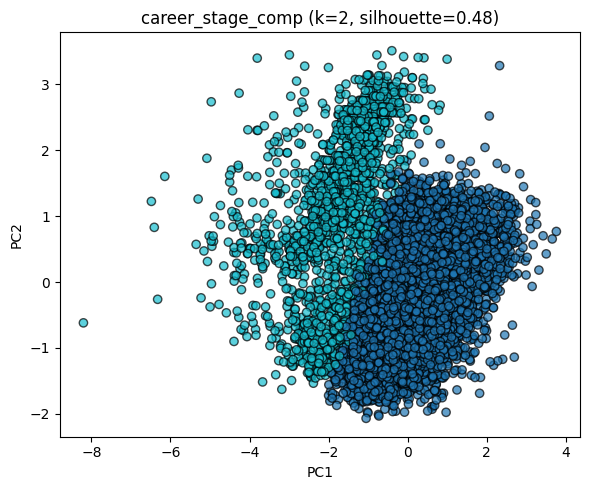

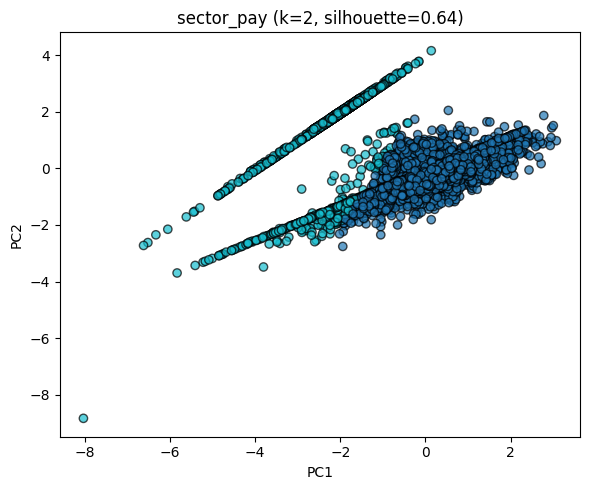

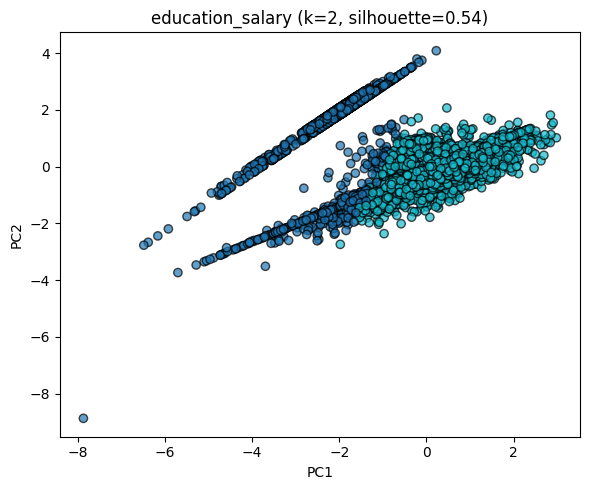

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Assume you already have:
#    - df: your original DataFrame with all transforms (base_slog, extra_slog, etc.)
#    - subsets: dict mapping subset names → list of column names
#    - results_df: DataFrame with columns ['subset','best_k','best_silhouette']

df['base_slog'] = signed_log(df['base'])
df['extra_total'] = df['bonus'] + df['overtime_pay'] + df['other']
df['extra_slog'] = signed_log(df['extra_total'])

# 2. Standardize all continuous features once
cont_cols = ['age','duration_total','duration_entity','duration_nominal','duration_overtime','base_slog','extra_slog']
scaler = StandardScaler()
df_scaled_cont = pd.DataFrame(scaler.fit_transform(df[cont_cols]), columns=cont_cols)

# 3. One-hot dummies (already created earlier)
df_dummies = pd.get_dummies(df[['sector','education','sex','contract']].astype(str), drop_first=True)

# 4. Loop through each subset, fit KMeans at its best_k, reduce to 2 PCs, and plot
for _, row in results_df.iterrows():
    name = row['subset']
    k = int(row['best_k'])

    # Build X for this subset
    cols = subsets[name]
    cont_in = [c for c in cols if c in df_scaled_cont.columns]
    cat_in  = [c for c in cols if c in df_dummies.columns]
    X = pd.concat([df_scaled_cont[cont_in], df_dummies[cat_in]], axis=1)

    # Fit KMeans
    km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
    labels = km.labels_

    # PCA to 2D
    pca = PCA(n_components=2, random_state=42)
    Z = pca.fit_transform(X)

    # Plot
    plt.figure(figsize=(6,5))
    plt.scatter(Z[:,0], Z[:,1], c=labels, cmap='tab10', alpha=0.7, edgecolor='k')
    plt.title(f"{name} (k={k}, silhouette={row['best_silhouette']:.2f})")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.tight_layout()
    plt.show()

Best k = 4, silhouette = 0.834


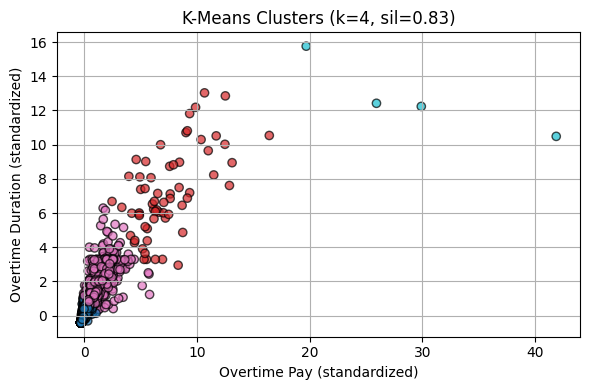

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Load and select features
df = pd.read_csv(path, sep=';')
X = df[['overtime_pay', 'duration_overtime']].copy()

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Find best K by silhouette for K=2…10
best_k, best_sil = None, -1
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    if sil > best_sil:
        best_k, best_sil = k, sil

print(f"Best k = {best_k}, silhouette = {best_sil:.3f}")

# 4. Fit KMeans with best K and plot clusters
km = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels = km.fit_predict(X_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(
    X_scaled[:, 0], X_scaled[:, 1],
    c=labels, cmap='tab10', edgecolor='k', alpha=0.7
)
plt.xlabel('Overtime Pay (standardized)')
plt.ylabel('Overtime Duration (standardized)')
plt.title(f'K-Means Clusters (k={best_k}, sil={best_sil:.2f})')
plt.grid(True)
plt.tight_layout()
plt.show()
